## Violent Crime Rates By US State
## Data Description
_Violent Crime Rates by US State:_ This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in Urban areas. This is a systematic approach for identifying and analyzing patterns and trend in crime using US Arrest dataset.

## What is Hierarchical Clustering?
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. One of the major considerations in using the K-Means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction. The ouput of the hierarchical algorithm is quite different from the K-means algorithm as well. It results in an inverted tree-shaped structure, called the _dendrogram._

### Types of Hierarchical Clustering:

There are two types of hierarchical clustering:

- _Agglomerative_: The data points are clustered using a bottom-up approach starting with individual data points.
- _Divisive_: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

- ## Steps to Perform Hierarchical Clustering:

Following are the steps involved in _agglomerative clustering_:

- At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K while K is an integer represnting the number of data points.
- Form a cluster by joining the two closest data point resulting in K-1 clusters.
- Form more clusters by joining the two closest clusters resulting in K-2 clusters.
- Repeat the above three steps untill one big cluster is formed.
- Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem.

In [6]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#library for normalization
from sklearn.preprocessing import StandardScaler 

In [8]:
# Hierachy library
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 

In [9]:
crime = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/US_violent_crime.csv")

In [10]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [11]:
# cchecking for missing values
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [12]:
#checking for numbers of rows and columns
crime.shape

(50, 5)

In [16]:
#information on the dataset
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [17]:
#checking for statistics on the dataset
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:
#rename the unnamed column to state
crime = crime.rename(columns = {"Unnamed: 0" : "States"})
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## 1) Murder Rate

<Axes: xlabel='States'>

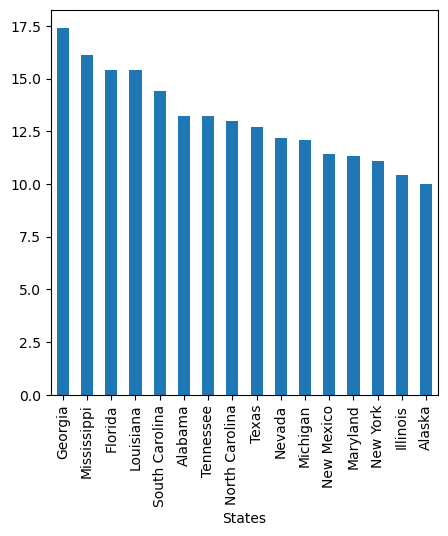

In [28]:
plt.figure(figsize= (5, 5))
crime.groupby("States")["Murder"].max().sort_values(ascending =False)[:16].plot(kind = "bar")

### Observations:
- Highest Murder Rate: Georgia and Missisipi
- Lowest Murder Rate: Idaho, Iowa, Maine, New Hampshire, North dakota, Vermont and Wisconsin.


<Axes: xlabel='States'>

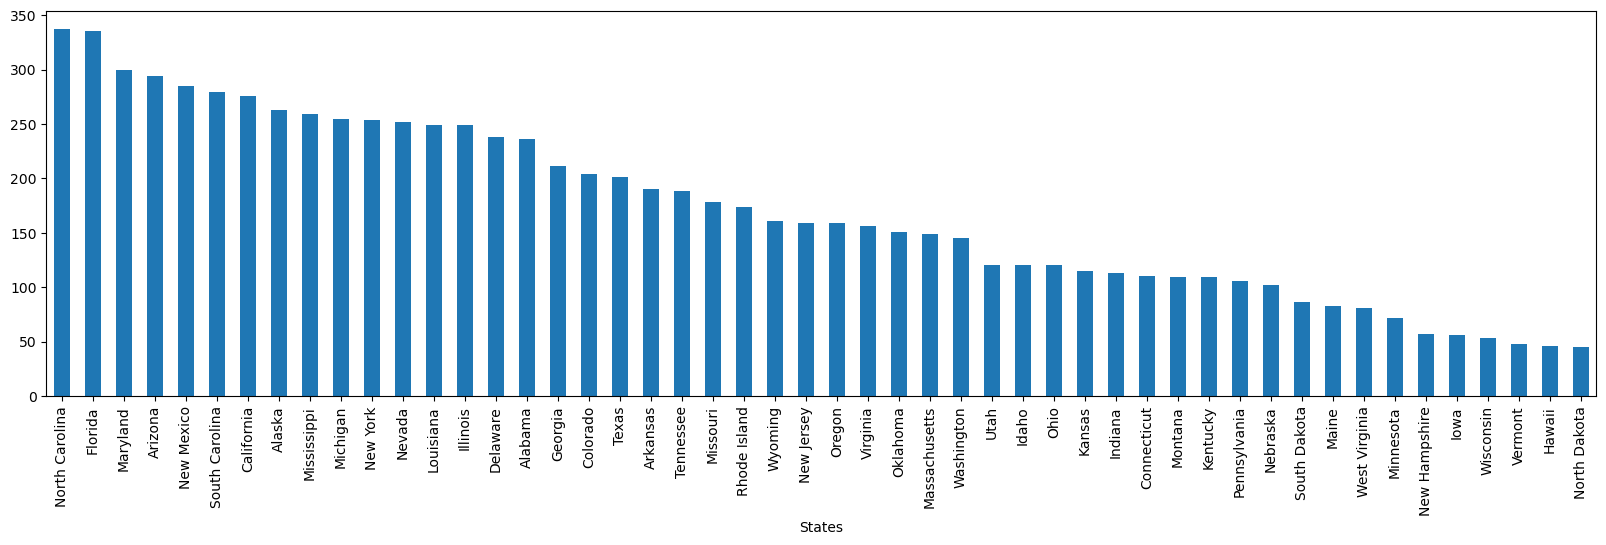

In [31]:
plt.figure(figsize= (20, 5))
crime.groupby("States")["Assault"].max().sort_values(ascending =False).plot(kind = "bar")

- #### Observations:

- Highest Assualt Rate: Floride and North California.
- Lowest Assualt Rate: Hawaii, North Dakota, Vermont, New Hampshire and Wisconsin.

<Axes: xlabel='States'>

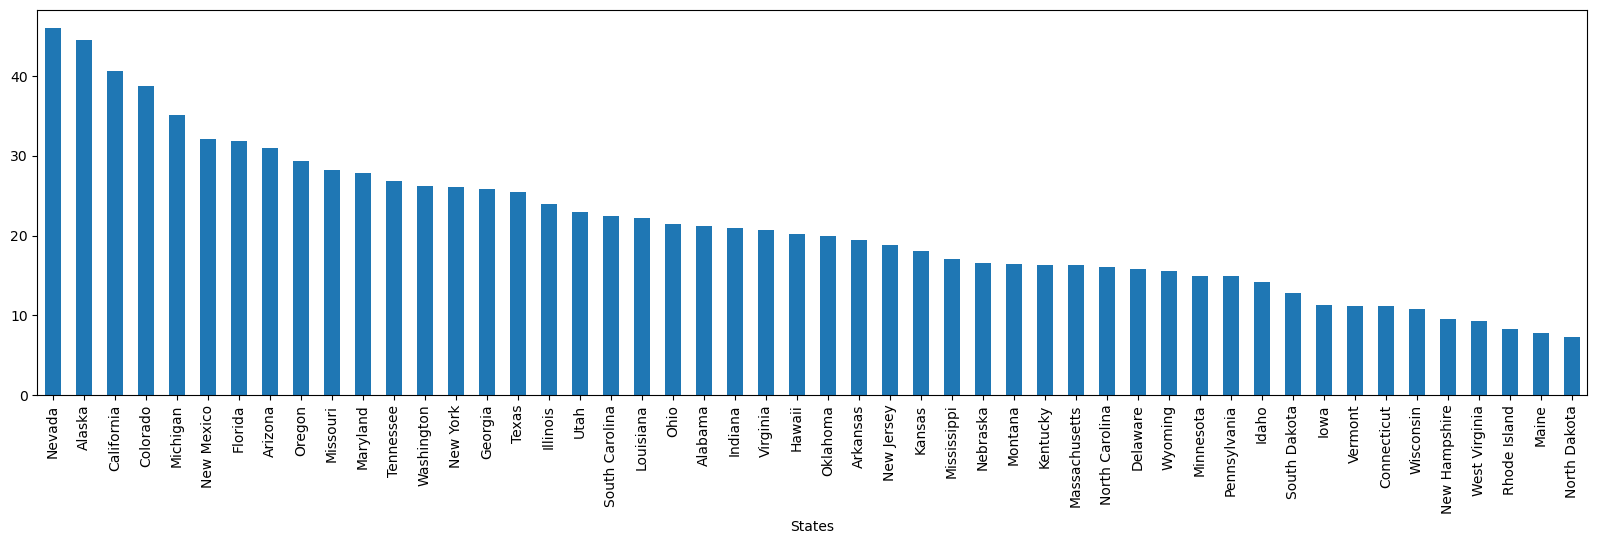

In [34]:
plt.figure(figsize= (20, 5))
crime.groupby("States")["Rape"].max().sort_values(ascending =False).plot(kind = "bar")

- #### Observations:

- Highest rape Rate: Nevada and Alaska
- Lowest Rape Rate: Maine, North Dakota, and Rhode island

In [37]:
# Tranforming the dataset (Standardization)
scaler = StandardScaler()
scaler

StandardScaler()

In [39]:
scaling = crime.iloc[:, 1:]

In [41]:
scaled_data = scaler.fit_transform(scaling)

In [43]:
pd.DataFrame(scaled_data, columns = scaling.columns).describe().round(3)

,Murder,Assault,UrbanPop,Rape
count,50.000,50.000,50.000,50.000
mean,-0.000,0.000,-0.000,0.000
std,1.010,1.010,1.010,1.010
min,-1.621,-1.524,-2.341,-1.503
25%,-0.861,-0.749,-0.770,-0.664
50%,-0.125,-0.143,0.032,-0.122
75%,0.803,0.948,0.852,0.533
max,2.229,2.015,1.777,2.671


## Types of Linkages:

#### 1) Single Linkage:
The distance between 2 clusters is defined as the shortest distance between points in the two clusters.

Text(0, 0.5, 'Euclidean distances')

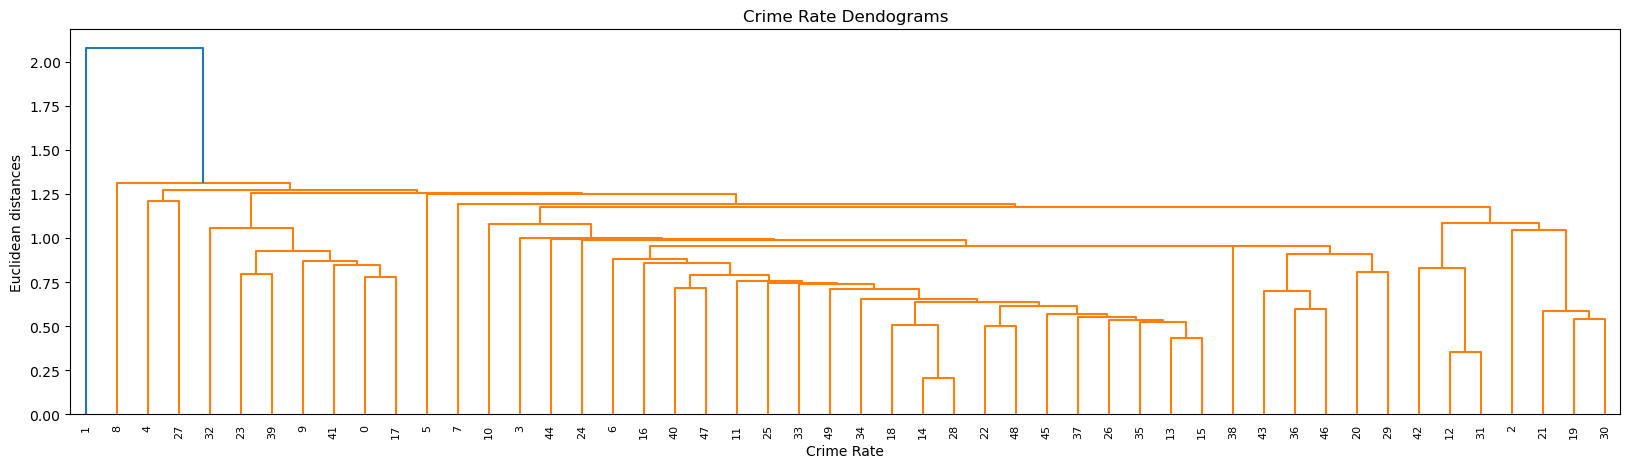

In [46]:
plt.figure(figsize = (20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method = "single"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")


The hierarchy class has s dendrogram method which takes the values returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

### 2) Complete Linkage:
The distance between 2 clusters is defined as the maximum distance between any 2 point in the clusters

Text(0, 0.5, 'Euclidean distances')

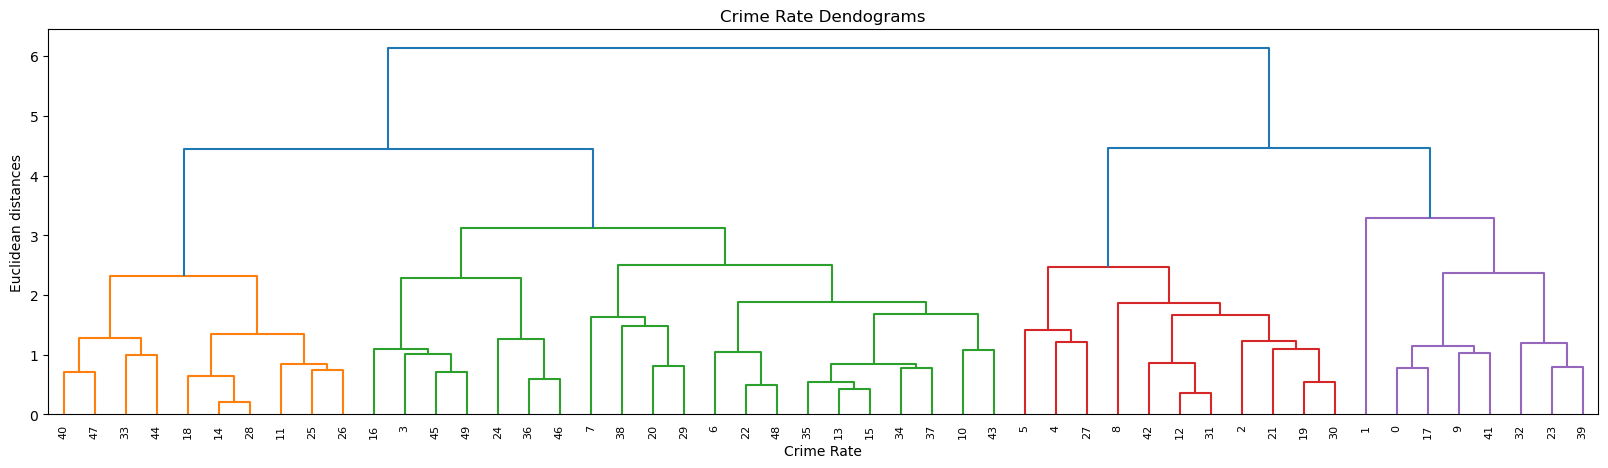

In [50]:
plt.figure(figsize = (20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method = "complete"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")


### 3) Average Linkage:
The distance between 2 cluster is defined as the average distance between every of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

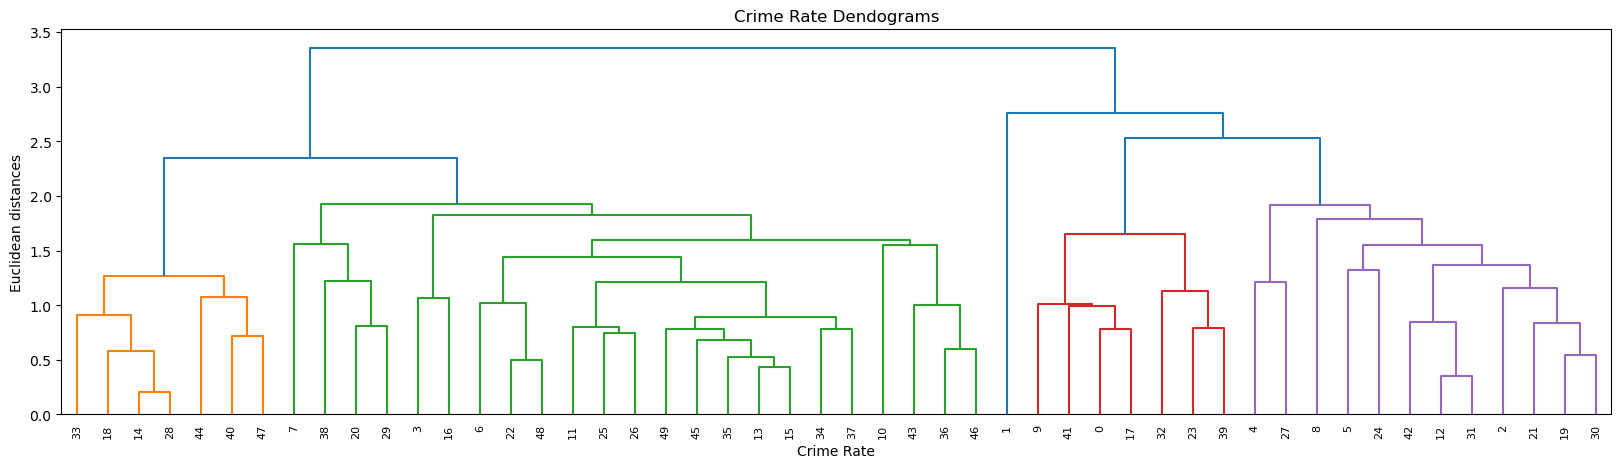

In [54]:
plt.figure(figsize = (20, 5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method = "average"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")


The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

### Ward method

It is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it's almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

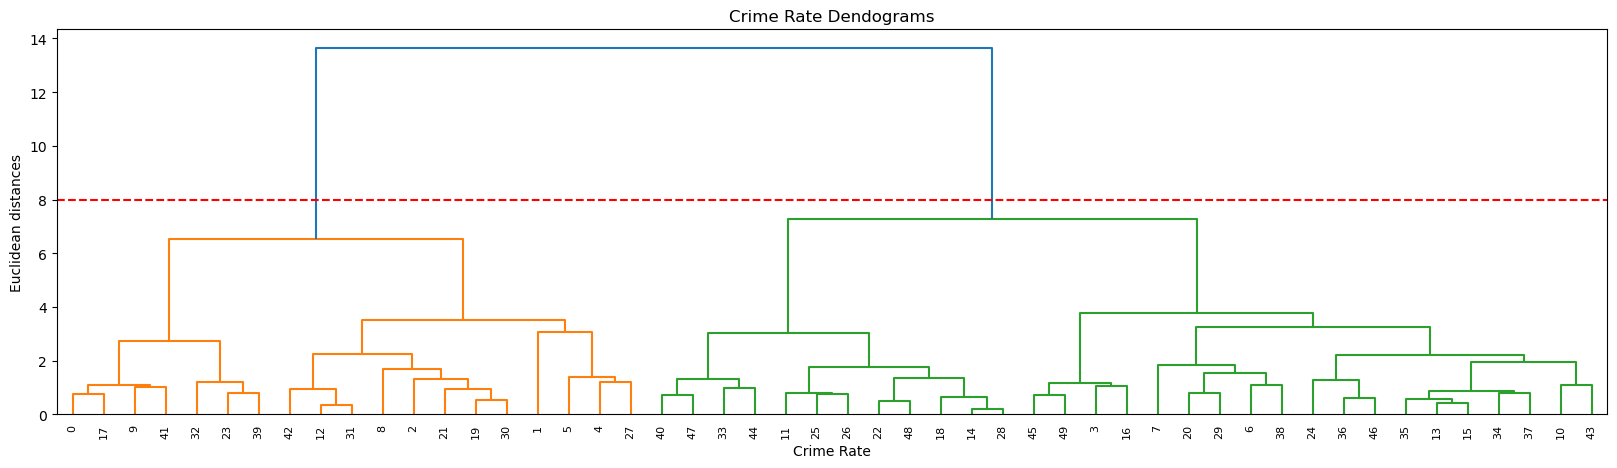

In [59]:
# with ward method
plt.figure(figsize = (20, 5))
plt.title("Crime Rate Dendograms")
dendogram = sch.dendrogram(sch.linkage(scaled_data, method = "ward"))
plt.xlabel("Crime Rate")
plt.ylabel("Euclidean distances")
plt.axhline(y=8, color ="r", linestyle= "--")
plt.show()

### How do we determine the optimal number of clusters from this diagram?

We look for the largest distance that we can see vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let's count the number of lines on the diagram and determines the oprtimal number of clusters. Cluster number will be 2 for this dataset.

In [62]:
#Fitting the Agglomerative clustering
AC = AgglomerativeClustering(n_clusters =2, metric="euclidean", linkage = "ward")
AC

AgglomerativeClustering()

In [64]:


#euclidean is distance btw the data point and the mean

In [66]:
# Fit and predict to have the cluster label
y_pred = AC.fit_predict(scaled_data)
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [68]:
crime["cluster labels"] = y_pred

In [70]:
# Let's see which state falls in which cluster
crime[["States", "cluster labels"]]

,States,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,0
4,California,1
5,Colorado,1
6,Connecticut,0
7,Delaware,0
8,Florida,1
9,Georgia,1


<Axes: xlabel='cluster labels', ylabel='Rape'>

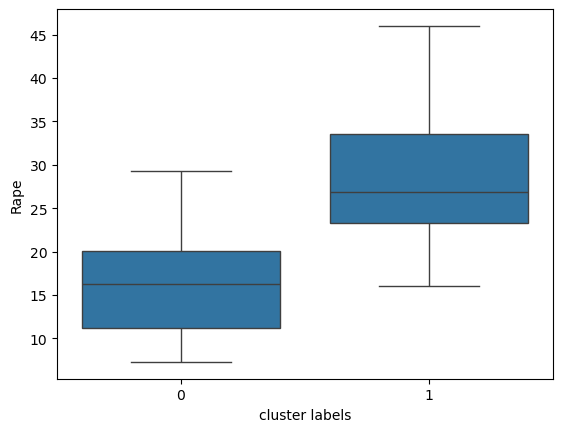

In [72]:
sns.boxplot(x = "cluster labels", y= "Rape", data= crime)

<Axes: xlabel='cluster labels', ylabel='Assault'>

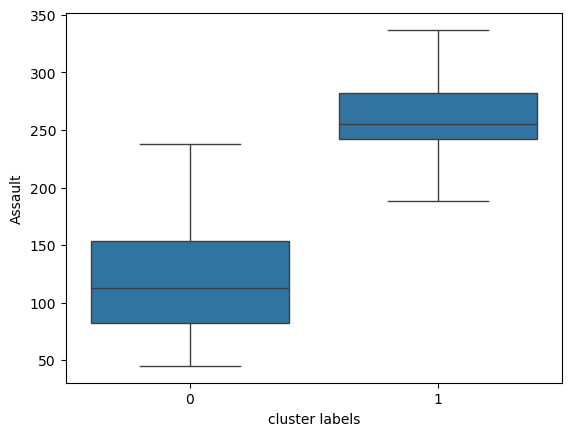

In [74]:
sns.boxplot(x = "cluster labels", y= "Assault", data= crime)

## Observations:

- The Cities in the Cluster-0 seems to be Safe-Zone where there are relatively less relatively less Murders, Assaults and Rapes.
- The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.



Let's display the cities in each zone now!

In [77]:
Danger_zone = crime.groupby("cluster labels")["States"].unique()[1]

In [79]:
Danger_zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Colorado',
       'Florida', 'Georgia', 'Illinois', 'Louisiana', 'Maryland',
       'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina', 'Tennessee', 'Texas'],
      dtype=object)

In [81]:
Safe_zone = crime.groupby("cluster labels")["States"].unique()[0]

In [83]:
Safe_zone

array(['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts',
       'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire',
       'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [85]:
data = crime.iloc[:, 1:].values
data

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

plt.figure(figsize= (10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='green', label = 'Safe_zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='yellow', label = 'Danger_zone' )          

## Customer segmentation using Hierachical Clustering
To segment client of an wholesale distributor based on their annual spending on diversse product categories, like milk, grocery, regoin, etc.

# Dataset
Wholesale Customer Data: The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wholesale_customers_data.csv")

In [8]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together. We will use Hierarchical Clustering for this problem.


# Scaling
Before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk (refer to the above table).

So, let’s first normalize the data and bring all the variables to the same scale:

In [16]:
from sklearn.preprocessing import normalize
scaled_data = normalize(data)
scaled_data = pd.DataFrame(scaled_data, columns = data.columns)
scaled_data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


# Creating a Dendrogram and Identifying the number of clusters
Here, we can see that the scale of all the variables is almost similar. Now, we are good to go. Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem:

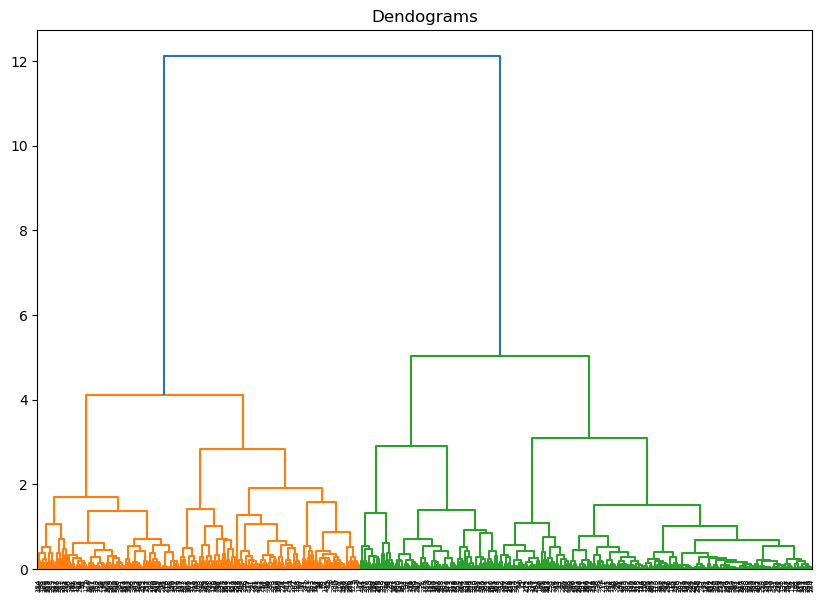

In [34]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method= "ward"))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold of 6 and cut the dendrogram:

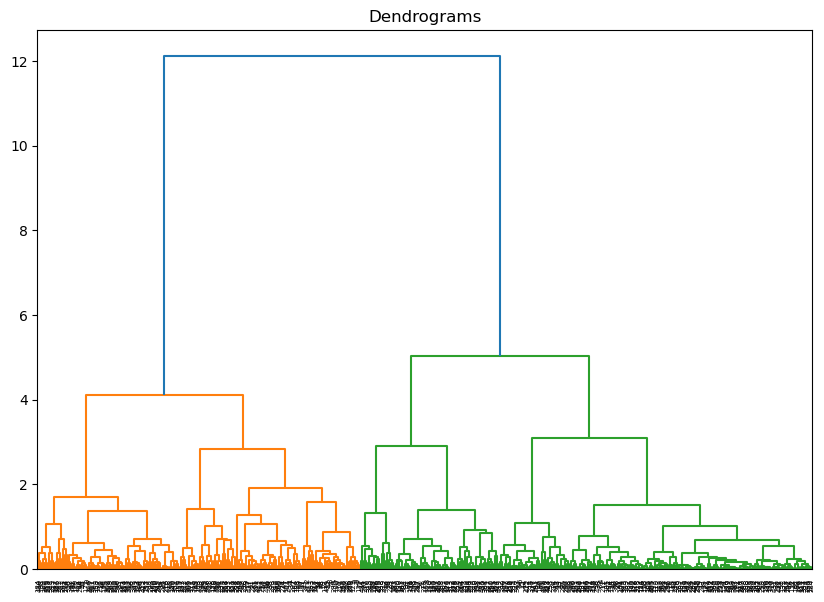

In [46]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title("Dendrograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method = "ward"))

we have two clusters as the line cuts the dendogram at the two points . Let's now apply hierachical clusterings for two clusters


## Applying hierachical Agglomerative clustering 

In [50]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, 
                                  metric = "euclidean",
                                  linkage = "ward")

In [54]:
data["cluster labels"] = cluster.fit_predict(scaled_data)

In [56]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0


In [58]:
data[data["cluster labels"]==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster labels
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,0
6,2,3,12126,3199,6975,480,3140,545,0
11,2,3,13146,1124,4523,1420,549,497,0
12,2,3,31714,12319,11757,287,3881,2931,0
...,...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395,0
434,1,3,16731,3922,7994,688,2371,838,0
435,1,3,29703,12051,16027,13135,182,2204,0
436,1,3,39228,1431,764,4510,93,2346,0


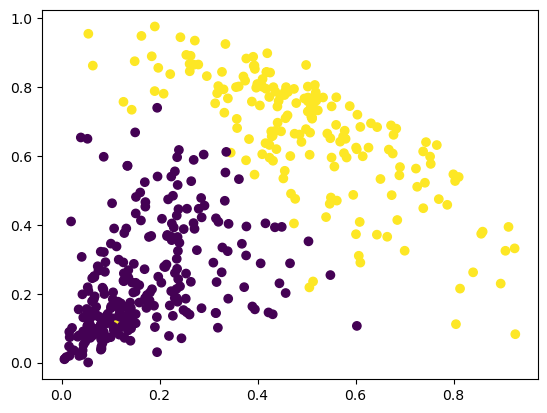

In [62]:
plt.scatter(scaled_data.Milk, scaled_data.Grocery, c = cluster.labels_)

# Clustering 
Clustering is a set of techniques used to partition data into groups, or clusters. Clusters are loosely defined as groups of data objects that are more similar to other objects in their cluster than they are to data objects in other clusters. 


Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering, which is implemented in sklearn.cluster.KMeans.

We begin with the standard imports: